In [ ]:
pip install pandas numpy matplotlib seaborn scikit-learn

In [58]:
#Importing the important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt


In [39]:
# Getting and Cleaning the Data
data = pd.read_csv(r"C:\Users\farou\Downloads\train.csv")
print(data.head())



   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [28]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [16]:
print(data['SalePrice'].describe())


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


In [30]:
null_cols = data.columns[data.isna().any()].tolist()
print(null_cols)


['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [45]:
data = data[["GrLivArea", "BedroomAbvGr", "FullBath", "HalfBath", "SalePrice"]]
print(data)
data.dropna(inplace= True)
print(data)

      GrLivArea  BedroomAbvGr  FullBath  HalfBath  SalePrice
0          1710             3         2         1     208500
1          1262             3         2         0     181500
2          1786             3         2         1     223500
3          1717             3         1         0     140000
4          2198             4         2         1     250000
...         ...           ...       ...       ...        ...
1455       1647             3         2         1     175000
1456       2073             3         2         0     210000
1457       2340             4         2         0     266500
1458       1078             2         1         0     142125
1459       1256             3         1         1     147500

[1460 rows x 5 columns]
      GrLivArea  BedroomAbvGr  FullBath  HalfBath  SalePrice
0          1710             3         2         1     208500
1          1262             3         2         0     181500
2          1786             3         2         1     223500

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   GrLivArea     1460 non-null   int64
 1   BedroomAbvGr  1460 non-null   int64
 2   FullBath      1460 non-null   int64
 3   HalfBath      1460 non-null   int64
 4   SalePrice     1460 non-null   int64
dtypes: int64(5)
memory usage: 57.2 KB


In [47]:
# Defining the features and the targest
# Our Features 
x = data[["GrLivArea", "BedroomAbvGr", "FullBath", "HalfBath", ]]
y = data["SalePrice"]

In [129]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2, random_state=30)
train_data = x_train.join(y_train)
print(train_data)

      GrLivArea  BedroomAbvGr  FullBath  HalfBath  SalePrice
327        1383             3         1         1     145250
1061        894             2         1         0      81000
161        2668             3         2         1     412500
109        1844             3         2         0     190000
973        1428             3         2         0     182000
...         ...           ...       ...       ...        ...
919        1414             3         1         0     176500
1164       1432             2         1         1     194000
500        1218             3         1         1     113000
941        2060             3         2         1     214000
421        1602             3         2         0     215000

[1168 rows x 5 columns]


array([[<Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BedroomAbvGr'}>],
       [<Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>],
       [<Axes: title={'center': 'SalePrice'}>, <Axes: >]], dtype=object)

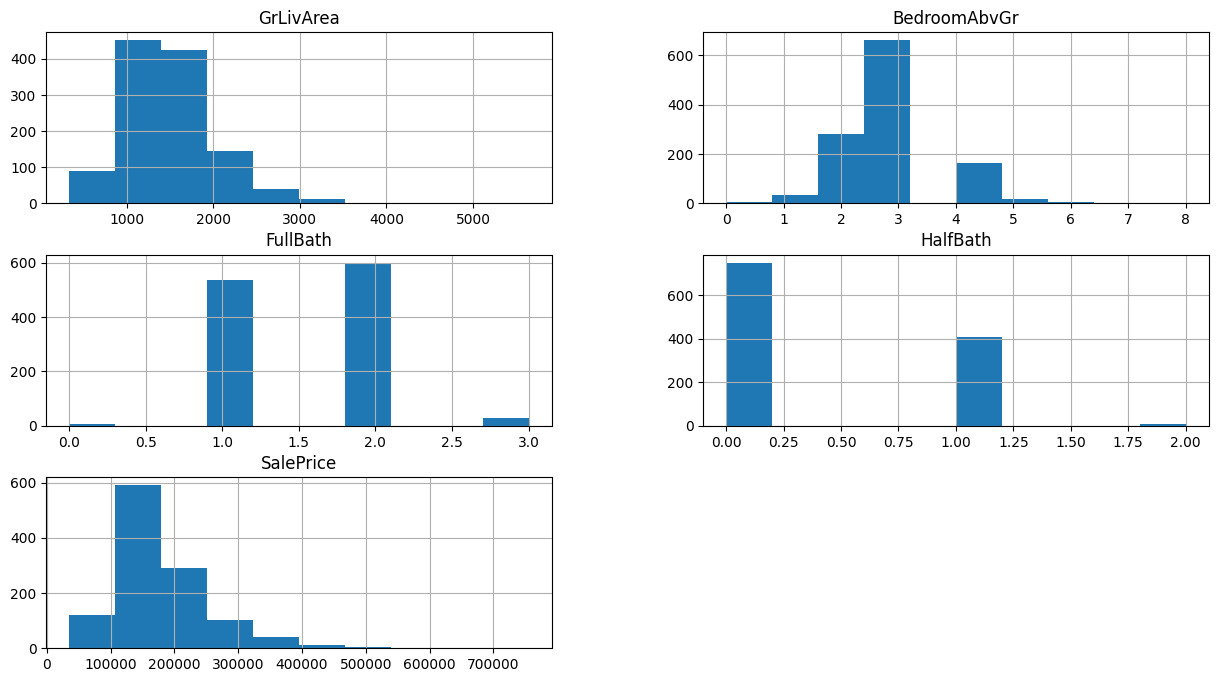

In [53]:
train_data.hist(figsize=(15,8))

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns



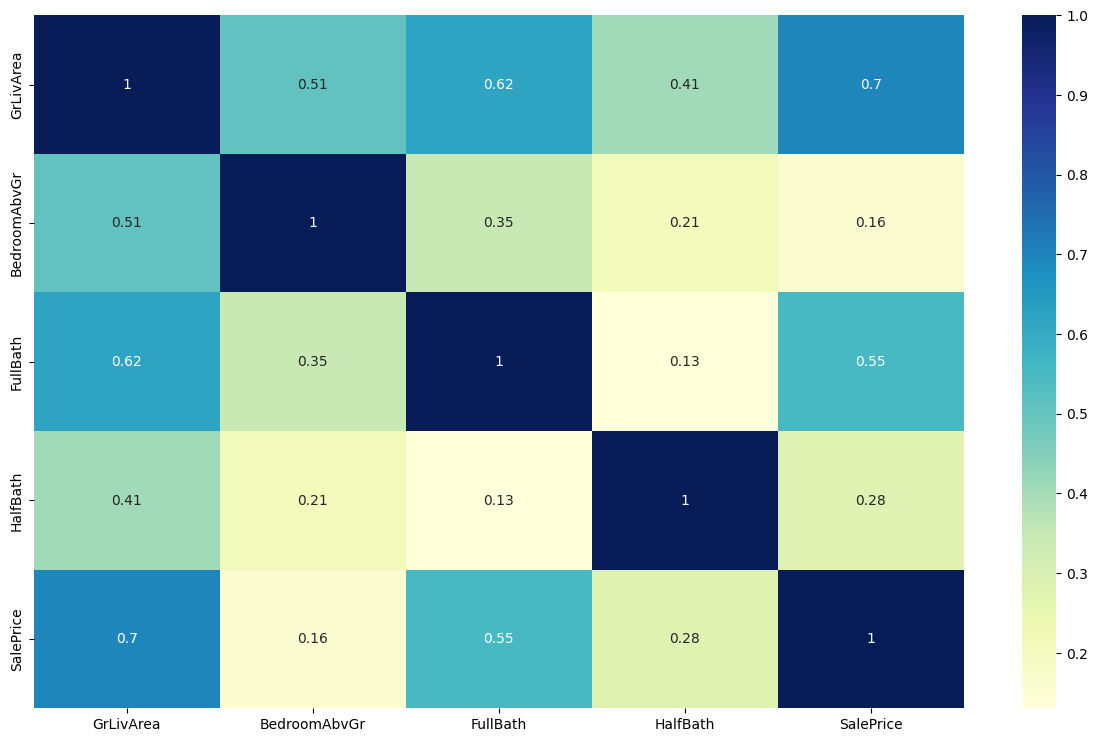

In [87]:
plt.figure(figsize=(15, 9))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")
plt.show()


In [108]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [130]:
from sklearn.metrics import r2_score , mean_squared_error
x_pred = model.predict(x_test)

mse = mean_squared_error(x_pred , y_test)
r2 = r2_score(x_pred , y_test)

print("The Mean Squared Error Is:", mse)
print("The R² Score Is:", r2)

The Mean Squared Error Is: 2789787584.216538
The R² Score Is: 0.22340557455981636


In [131]:
corr = train_data.corr()
print(corr["SalePrice"].sort_values(ascending=False).head(10))


SalePrice       1.000000
GrLivArea       0.689966
FullBath        0.572204
HalfBath        0.286614
BedroomAbvGr    0.179365
Name: SalePrice, dtype: float64


In [ ]:

y = np.log1p(train_data["SalePrice"]) 


In [133]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)


In [134]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(x)


In [138]:
from sklearn.preprocessing import PolynomialFeatures

# create polynomial transformer
poly = PolynomialFeatures(degree=2, include_bias=False)

# fit and transform training data
x_train_poly = poly.fit_transform(x_train)

# transform test data (important: use transform, not fit_transform!)
x_test_poly = poly.transform(x_test)


In [139]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train_poly, y_train)

# make predictions
y_pred = model.predict(x_test_poly)


In [140]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R²:", r2)


MSE: 2652050483.9419575
R²: 0.6588084353267527


In [141]:
# Test the separate file
test1 = pd.read_csv(r"C:\Users\farou\Downloads\test.csv")


In [ ]:
import pandas as pd
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
feature_columns = list(x_train.columns)

len(feature_columns), feature_columns[:10]


(4, ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath'])

In [ ]:

model = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("reg", LinearRegression())
])

model.fit(x_train[feature_columns], y_train)

y_pred_val = model.predict(x_test[feature_columns])
print("Holdout MSE:", mean_squared_error(y_test, y_pred_val))
print("Holdout R²:", r2_score(y_test, y_pred_val))


Holdout MSE: 2652050483.862191
Holdout R²: 0.6588084353370147


In [ ]:
missing = [c for c in feature_columns if c not in test1.columns]
extra   = [c for c in test1.columns if c not in feature_columns]

if missing:
    print("Adding missing columns (filled with NaN for imputation):", missing)
    for c in missing:
        test1[c] = np.nan 

if extra:
    print("Ignoring extra columns not used in training:", extra)
X_test_new = test1[feature_columns]
X_test_new.shape


Ignoring extra columns not used in training: ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence

(1459, 4)

In [ ]:
y_pred_new = model.predict(X_test_new)

y_pred_new[:10]


array([116216.15917465, 145521.40788815, 193223.3535753 , 188291.9828159 ,
       191289.27462173, 198282.34917367, 146885.85806125, 159676.5136683 ,
       175449.49576063, 114556.95077533])

In [ ]:
id_col = None
for candidate in ["Id", "ID", "id", "index"]:
    if candidate in test1.columns:
        id_col = candidate
        break

if id_col is None:
    output = pd.DataFrame({"Id": np.arange(1, len(y_pred_new)+1), "Prediction": y_pred_new})
else:
    output = pd.DataFrame({id_col: test1[id_col], "Prediction": y_pred_new})

output.to_csv("predictions.csv", index=False)
print("Saved -> predictions.csv")
output.head()


Saved -> predictions.csv


,Id,Prediction
0,1461,116216.159175
1,1462,145521.407888
2,1463,193223.353575
3,1464,188291.982816
4,1465,191289.274622
